# MCS 275 Spring 2022 Worksheet 7 Solutions

* Course instructor: David Dumas
* Solutions prepared by: Jennifer Vaccaro, Johnny Joyce

## Topics

The main topics of this worksheet are **recursion with backtracking** and **sorting**.

The problems about the maze module allow variations and extensions that could probably occupy an entire discussion.  However, please make sure to get some practice with the sorting material, too.

## Resources

These things might be helpful while working on the problems.  Remember that for worksheets,  we don't strictly limit what resources you can consult, so these are only suggestions.

* [Lecture 15 - Recursion with backtracking](http://dumas.io/teaching/2022/spring/mcs275/slides/lecture15.html)
* [Lecture 16 - Mergesort](http://dumas.io/teaching/2022/spring/mcs275/slides/lecture16.html)
* [Lecture 17 - Quicksort](http://dumas.io/teaching/2022/spring/mcs275/slides/lecture17.html)
* [maze.py](https://github.com/daviddumas/mcs275spring2022/blob/main/samplecode/recursion/maze.py)
* [solvemaze.py](https://github.com/daviddumas/mcs275spring2022/blob/main/samplecode/recursion/solvemaze.py)
* [sorts.py](https://github.com/daviddumas/mcs275spring2022/blob/main/samplecode/recursion/sorts.py)
* [Downey's book](https://greenteapress.com/thinkpython2/html/)
* MCS 260 course materials from Fall 2021:
    * [Slides, homework, worksheets, and projects](https://www.dumas.io/teaching/2021/fall/mcs260/)
    * [Sample programs](https://github.com/daviddumas/mcs260fall2021/tree/main/samplecode)

## I. Mazes

### 1. Learn a little more about `maze.py`

This problem involves reading and learning more about the module `maze` we discussed in Lecture 15.  You'll use the things you learn about here in subsequent problems.

In Lecture 15 we discussed a minimal way of using the module:
* Create a `Maze` object (e.g. with `M = maze.Maze(xsize=7,ysize=7)`
* Set some squares to blocked (using `M.set_blocked` for individual squares, and/or `M.apply_border` which makes all of the edge squares blocked)
* Set the start and goal (`M.start` and `M.goal`) locations
* Use a recursive backtracking function to find a path from the start to the goal
The function created in the last step can be found in [solvemaze.py](https://github.com/daviddumas/mcs275spring2021/blob/master/samplecode/recursion/solvemaze.py).

The module `maze` has several other features:

#### Saving a maze as SVG file

`Maze` objects have a method `save_svg(filename)` that writes a graphical representation of the maze to a file in the SVG format.  This is a vector graphics format (scalable, not pixel-based) that can be viewed in most web browsers.

This method also accepts an optional argument `highlight`, which if given should be a list of `(x,y)` pairs that indicate squares in the maze that should be higlighted in light blue.  For example,
```
mymaze.save_svg("cool.svg",highlight=[ (2,1), (3,1), (4,1) ])
```
will save the maze to `cool.svg`, and highlight three squares in blue.

The `highlight` argument is provided as a way to indicate the solution of a maze, or any other feature you might choose to display.

#### Saving a maze as a PNG file

For this feature, you need to install a module that isn't in Python's standard library.  The module `PIL` is from a package called *Pillow*, and is used to work with image files.  The following command should install it:
```
python3 -m pip install pillow
```

After installing Pillow, you can save a maze object as a PNG file (a bitmap graphics format supported by nearly every program that deals with images) using the `save_png` method.  Its arguments are:
```
save_png(filename,scale=1,highlight=[])
```
The argument `scale` is a positive integer controlling the width of each maze square in pixels.  The default, `scale=1`, will result in a tiny image file where each pixel is a maze square.  To get a reasonable size output image, try `scale=10` or `scale=30`.

#### Random Mazes

The class `PrimRandomMaze` inherits from `Maze` and automatically generates a random maze that has exactly one path from the start to the goal.  Its constructor takes only two arguments

```
PrimRandomMaze(xsize,ysize)
```
and both `xsize` and `ysize` must be **odd** numbers.  This random maze generator uses [Prim's algorithm](https://en.wikipedia.org/wiki/Prim%27s_algorithm), which is known for producing mazes of moderate difficulty, with many short dead ends.

### 2. Basic solved maze image

Make a Python script that imports `maze` and `solvemaze` and uses them to do the following:

* Accept one command line argument, an odd integer `n`
* Generate a random maze of size `n` by `n`
* Solve the maze by recursize backtracking
* Write the solved maze (with solution highlighted) to a SVG file

Test the program, loading the SVG file it produces in a web browser.

Also try the same but with a PNG file as the output image type.

If everything works, your images should look a bit like [this](https://dumas.io/teaching/2022/spring/mcs275/slides/images/example-maze-solved.png).

Path under consideration: [(1, 1)]
Path under consideration: [(1, 1), (2, 1)]
Path under consideration: [(1, 1), (2, 1), (3, 1)]
Path under consideration: [(1, 1), (2, 1), (3, 1), (4, 1)]
Path under consideration: [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]
Path under consideration: [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2)]
Path under consideration: [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3)]
Path under consideration: [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (4, 3)]
Path under consideration: [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (4, 3), (3, 3)]
Path under consideration: [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (4, 3), (3, 3), (2, 3)]
Path under consideration: [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (4, 3), (3, 3), (2, 3), (1, 3)]
Path under consideration: [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (4, 3), (3, 3), (3, 4)]
Path under consideration: [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (

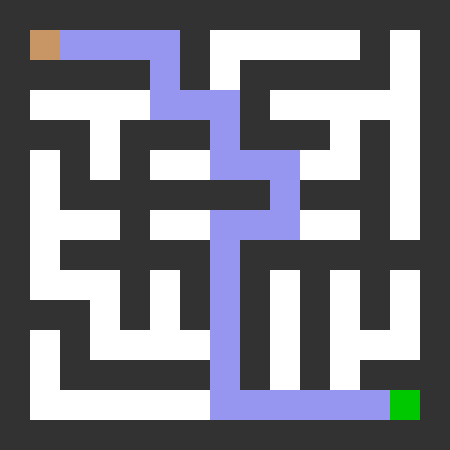

In [5]:
import maze
import solvemaze
import sys

if len(sys.argv) > 1:
    n = int(sys.argv[1])
    if n % 2 != 1: 
        print("Integer n must be odd.")
        exit()
else:
    print("No command line argument detected. Defaulting to 11.")
    n = 11

M = maze.PrimRandomMaze(n,n)
path = solvemaze.solvemaze(M)

M.save_svg("prob2.svg",highlight=path)
M.save_png("prob2.png",scale=30,highlight=path)

# Code below displays an image in a notebook cell.
# Uncomment if you want to see the image in the notebook itself
#from IPython.display import Image
#Image(filename='prob2.png') 

### 3. Solution history

Add a new function `solvemaze_history()` to `solvemaze.py` that works similarly to `solvemaze()` but which returns a list of every path considered (rather than just a single path that is a solution).  Thus the last item in the returned list will be a solution, if a solution exists.

Then, write a script that uses `solvemaze_history` to do the following:
* Take a command line argument, an odd integer `n`
* Generate a random `n` by `n` maze
* Solve the maze, keeping track of the history of paths considered
* Save a sequence of output image files with names like `dfs001.png`, `dfs002.png`, etc., that highlight the paths considered by the solver

Run this on a maze of moderate size (e.g. 9x9) and flip through the resulting images in your platform's image viewer to make a crude animation of the recursive process.

# Solution:

### In `maze.py`:

The code below is a modified version of `solvemaze()` and has relatively few changes. To directly view the changes between the original and modified versions, see the following link: **https://www.diffchecker.com/LbrKWcSL**

In [ ]:
def solvemaze_history(M,path_list=None, solved=False):
    """
    Functions similarly to `solvemaze`, but returns a list of all paths
    considered throughout solving process. Uses additional arg `solved`
    to track whether solution has been found.
    """
    if path_list==None:
        # no path specified, so start
        # at M.start
        path_list = [[M.start]] # Use a list of lists for path_list - one list for each path.
    else:
        print("Called with path={}".format(path_list[-1]))
    path = path_list[-1]
    if path[-1]==M.goal:
        # We've found a solution
        print("SOLVED!")
        return path_list, True # Set the "solved" variable to True
    # next steps to consider
    # (may include retracing our steps)
    steps = M.free_neighbors(*path[-1])
    for s in steps:
        if len(path)>=2 and s == path[-2]:
            print("Not considering {}, as it would retrace our steps".format(s))
            continue
        # Consider whether next step `s` leads to a solution
        print("Considering next step {}".format(s))
        next_path = path + [s]
        path_list.append(next_path)
        soln, solved = solvemaze_history(M,path_list)
        if solved:
            # Some recursive call yielded a solution!
            print("Hooray, considering {} worked!".format(s))
            return soln, True # # Set the "solved" variable to True
        # if we reach this line, step `s` only led to dead ends
    # if we reach this line, then no continuation of `path`
    # leads to a solution, only dead ends.
    # Still need to return path_list so we can visualize it later
    print("Path {} leads only to dead ends".format(path))
    return path_list, False # Keep the "solved" variable as False.

### Calling the script:

In [ ]:
import maze
import solvemaze
import sys

if len(sys.argv) > 1:
    n = int(sys.argv[1])
    if n % 2 != 1: 
        print("Integer n must be odd.")
        exit()
else:
    print("No command line argument detected. Defaulting to 11.")
    n = 11

M = maze.PrimRandomMaze(n,n)

path_list, _ = solvemaze.solvemaze_history(M) # `_` represents a boolean variable we don't need anymore



for i,p in enumerate(path_list):
    M.save_png("dfs{:03d}.png".format(i),scale=30,highlight=p) 

### Example output:

The individual images were stitched together into a single animated gif using a third-party website so it would fit nicely here. For the worksheet problem itself, having the individual images is sufficent.

![worksheet7q3animated](images/worksheet7q3animated.gif)

### 4. Simple custom mazes

Instead of using the `PrimRandomMaze` class to generate a maze, write your own subclass of `Maze` that creates a maze in which `start` and `goal` are set, the border is fully blocked, and so that it is possible to get from `start` to `goal`.  The constructor should create some obstacles between the start and goal, to make the maze more interesting.

For example, you might make a class that simply places a large rectangle of blocked squares in the middle of the maze, so that a solution must either go along the top and right, or bottom and left.  Or you might make some walls coming out of the sides, so that a solution needs to turn back and forth several times.

The key characteristics you are looking for are:

* Ability to generate a maze of a given size (specified as arguments to the constructor)
* Certainty that the maze always has a solution

It's OK for the constructor to decide a size is too small or is otherwise unacceptable, and raise an exception.  But to keep things interesting, it *should* allow arbitrarily large mazes.

Write a script that instantiates your class and then uses `solvemaze` to find a solution.  Save the solved maze to a SVG file.

# Solution:

### In `maze.py`:

In [ ]:
class BlockMaze(Maze): # Create a new class that subclasses maze.maze
    """Maze that blocks out the center and border, so the solution is going around the perimeter."""
    def __init__(self, n=5):
        """Creates an nxn maze with the border and center blocked out, and start/goal in opposite corners."""
        if n<5:
            raise ValueError("The maze must have size 5 at a minimum")
        super().__init__(n,n,start=(1,1),goal=(n-2,n-2))
        
        # block out the border using apply_border. No need to call super, since we don't override the base class function
        self.apply_border()
        
        # block out the center square using set_blocked
        for x in range(2,n-2):
            for y in range(2,n-2):
                self.set_blocked(x,y)
                
class CustomMaze(Maze): # Create a new class that subclasses maze.maze
    """Maze with obstacles specifically defined by user."""
    def __init__(self, n=5, obstacles = []):
        """
        Takes arg `obstacles` as list of 2-tuples of the form (x,y) for integers `x` and `y`
        Each entry (x,y) of `obstacles` specifies an obstacle at coordinates (x,y)
        """
        if n<5:
            raise ValueError("The maze must have size 5 at a minimum")
        super().__init__(n,n,start=(1,1),goal=(n-2,n-2))
        self.obstacles = obstacles

        # block out the border using apply_border. No need to call super, since we don't override the base class function
        self.apply_border()
        
        # Block out any obstacles
        for x in range(2,n-2):
            for y in range(2,n-2):
                if (x,y) in self.obstacles:
                    self.set_blocked(x,y)

### An example custom maze:

In [ ]:
import maze
import solvemaze

M = maze.CustomMaze(n, obstacles=[ (3,2), (3,3), (3,4), (3,5), (3,6), (3,7), (3,8), (3,9), (3,10),
                                                        (4,5),
                                   (5,2), (5,3), (5,4), (5,5), (5,6), (5,7), (5,8), (5,9), (5,10),
                                   (7,2),        (7,4), (7,5), (7,6), (7,7), (7,8), (7,9), (7,10)])

M.save_png("worksheet7q5.png")

![worksheet7q5](images/worksheet7q5.png)

## II. Sorting

### 5. Merge sorted stacks

Recall that a *stack* is a data structure that mimics a physical stack of items, where the only available operations are to remove the top item (`pop`) or add a new item to the top (`push`).

In Python, you can simulate a stack using a list by limiting yourself to only calling the methods
* `.pop()` for the stack pop operation, and
* `.append(x)` for the stack push operation
In this way, the end of the list becomes the top of the stack.

In mergesort, the main step was to create a function that can merge two sorted lists.  We made a version of this that uses indexing by integers.  However, the algorithm for merging two sorted lists only ever needs to look at the "next" item from each of the lists, meaning it can also be implemented using stacks.

Make a function `merge_sorted_stacks(A,B,S)` that takes two stacks `A` and `B` whose elements are in sorted order, with the top of each stack being the smallest element, and an initially empty stack `S`.  The function should merge the two stacks into a single reverse-sorted stack `S`.  It can destroy `A` and `B` as it does so.

# Solution

In [31]:
def merge_sorted_stacks(A,B,S=[]):
    '''Takes two sorted stacks A & B. Returns merged sorted stack'''
    A_next = A.pop() # Get first item from each list
    B_next = B.pop()
    
    # Take items from A and B until one list is empty
    while True:
        
        if A_next <= B_next:
            S.append(A_next)
            try:
                A_next = A.pop()
            except IndexError: # Occurs if A is empty and nothing can be popped
                S.append(B_next)
                S.extend(B) # We are finished with A, so put the rest of B into S
                break
                
        else:
            S.append(B_next)
            try:
                B_next = B.pop()
            except IndexError: # Occurs if B is empty and nothing can be popped
                S.append(A_next)
                S.extend(A) # We are finished with B, so put the rest of A into S
                break
    return S

In [32]:
# Example with numbers
# A list of numbers is a sorted stack if it is in descending order
# meaning the top of stack (last element of the list) is the smallest.
A = [5,3,1]
B = [6,4,3,2,0]
S = []
merge_sorted_stacks(A,B,S)
S  # will be a reverse sorted stack: top will be largest element

[0, 1, 2, 3, 3, 4, 5, 6]

In [33]:
# Example with strings
# A list of strings is a sorted stack if it is in reverse alphabetical order
# meaning the top of stack (last element of the list) is the earliest in 
# the Python string order
S = []
merge_sorted_stacks(
    ["zebra","kangaroo","aardvark"],
    ["newt","asp"],
    S)
S

['aardvark', 'asp', 'kangaroo', 'newt', 'zebra']

### 6. Mergesort and quicksort timing comparison

Which of the sorthing algorithms we implemented in lecture (contained in [mergesort.py](https://github.com/daviddumas/mcs275spring2021/blob/master/samplecode/recursion/mergesort.py) and [quicksort.py](https://github.com/daviddumas/mcs275spring2021/blob/master/samplecode/recursion/quicksort.py)) is faster for long lists of integers?  What about short lists?

To investigate this, make a program that does the following things for N = 10, 100, 1_000, 10_000, 100_000, and 1_000_000:

* Make a list `L` of N random integers between `1` and `10*N`
* Make a copy of that list, e.g. with `L2 = [ x for x in L ]`.  Note that `L2 = L` will **not** work, because that would simply make `L` and `L2` two names that refer to the same list.
* Sort `L` with quicksort, making note of how long it takes
* Sort `L2` with mergesort, making note of how long it takes
* Check that `L` and `L2` are now equal, raising an exception if they are not.  (This isn't strictly necessary, but it adds a consistency check that would probably detect if either sorting algorithm was broken.)

Then, display the results as a table.  You can use whatever formatting you think would be most helpful, e.g.
```
N=1000  t_merge=0.1219s t_quick=0.4158s
```

What does this show?  Is one clearly faster?  By what ratio?  Does the ratio change very much with N?

# Solution

In [1]:
import random
import time
import sorts

for N in [10, 100, 1_000, 10_000, 100_000]: # 1_000_000 omitted for stability
    L = [random.randint(0,10*N) for i in range(N)]
    L2 = [x for x in L] # Make a copy of L
    
    quicksort_start = time.time()
    sorts.quicksort(L)
    quicksort_end = time.time()
    
    mergesort_start = time.time()
    L2 = sorts.mergesort(L2)
    mergesort_end = time.time()
    
    print("N = {}".format(N))
    print("Quicksort time: {} seconds".format(quicksort_end - quicksort_start))
    print("Mergesort time: {} seconds".format(mergesort_end - mergesort_start))
    print("")
    
    assert L == L2

N = 10
Quicksort time: 0.0 seconds
Mergesort time: 0.0 seconds

N = 100
Quicksort time: 0.0 seconds
Mergesort time: 0.0 seconds

N = 1000
Quicksort time: 0.00995016098022461 seconds
Mergesort time: 0.005982398986816406 seconds

N = 10000
Quicksort time: 0.057843685150146484 seconds
Mergesort time: 0.05086350440979004 seconds

N = 100000
Quicksort time: 0.9025774002075195 seconds
Mergesort time: 1.3035147190093994 seconds



### 7. Quicksort with middle element pivot

The quicksort implementation we discussed in lecture uses the last element of the list as a pivot.  However, by swapping some other element of the list to the end just before calling `partition`, it is possible to use the same `partition` function while selecting a different element as the pivot.

Make a new version of `quicksort` that uses the element closest to the middle of the list as possible as the pivot.  (Of course, it is operating on a slice of the list between `start` and `end`, so it will need to look at the middle of that *part*.)

Test your modified version of quicksort to confirm that it works properly.

Compare the running time of your modified quicksort versus the one from lecture for a list that is already sorted.  Is one of them noticeably faster?

In [ ]:
def quicksort(L,start=0,end=None):
    """Reorder elements of L so that L[start:end] is sorted."""
    if end == None:
        end = len(L)

    if end-start <= 1:
        # zero or one-element lists are always sorted
        return

    # Arrange it so that L[m] is a pivot:
    # Everything less than the pivot is in
    # L[start:m], and everything greater than
    # or equal to the pivot is in L[m+1:end]
    m = partition(L,start,end)
    
    # Recursive calls to quicksort will sort
    # the sublists to either side of the pivot.
    quicksort(L,start,m)
    quicksort(L,m+1,end)

def partition(L,start=0,end=None):
    """Look at L[start:end].  Take the middle element as a pivot.
    Move elements around so that any value less than the pivot 
    appears before it, and any element greater than or equal to
    the pivot appears after it.  L is modified in place.  The
    final location of the pivot is returned."""

    if end == None:
        end = len(L)
    
    # Move the middle element of L to the end by swapping it with the last element.
    # Then the rest of the logic will use the "original" middle element as the pivot, and return its index.
    middle = (start + end)//2
    L[end-1],L[middle] = L[middle],L[end-1]

    pivot = L[end-1]
    dst = start
    for src in range(start,end):
        if L[src] < pivot:
            L[src], L[dst] = L[dst], L[src]
            dst += 1

    L[end-1], L[dst] = L[dst], L[end-1]
    return dst